__*Group Members:*__  

__*Gaurav Kumar(19HCS4017)*__

__*Falendra Dewangan(19HCS4016)*__

__*Chinmaya Ranjan Bhoi(19HCS4013)*__

__*Deepanshu Attri(19HCS4062)*__

__*Praveen Kumar(19HCS4039)*__


__*Course: BSc(Hons) Computer Science*__

__*Semester: 6th*__

__*Paper: Data Mining*__

__*Project: KMeans Clusterring on California housing price dataset*__

In [1]:
# importing the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from sklearn.cluster import KMeans
from sklearn.preprocessing import *
from itertools import cycle, islice
import seaborn as sns

In [2]:
# reading the dataset
df_Calidata=pd.read_csv("housing.csv")

In [3]:
# number of rows and columns:
df_Calidata.shape

(20640, 10)

In [4]:
# Top 5 rows:
df_Calidata.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# summary statistics of numeric columns:
df_Calidata.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
# printing info of hte dataset
df_Calidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# value count for each category in ocean_proximity
df_Calidata['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
# Checking missing values
df_Calidata.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
# finding the mode to fill in the missing values
mode=statistics.mode(df_Calidata['total_bedrooms'])
mode

280.0

In [10]:
# Filling missing 'total_bedrooms' values with mode since mean doesn't make sense for total bedrooms:
df_Calidata['total_bedrooms']=df_Calidata['total_bedrooms'].fillna(df_Calidata['total_bedrooms'].mode()[0])

# Again Checking missing values
df_Calidata.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
df_Calidata.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [12]:
# changing the type of ocean_proximity to category
df_Calidata["ocean_proximity"] = df_Calidata["ocean_proximity"].astype('category')

df_Calidata.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity       category
dtype: object

In [13]:
df_Calidata.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
# Scaling the required features
features = ['longitude', 'latitude','median_income', 'median_house_value']
df_Calidata1 = df_Calidata[features]
df_Calidata1.columns

Index(['longitude', 'latitude', 'median_income', 'median_house_value'], dtype='object')

In [15]:
# standarizing the dataset
X = StandardScaler().fit_transform(df_Calidata1)
X

array([[-1.32783522,  1.05254828,  2.34476576,  2.12963148],
       [-1.32284391,  1.04318455,  2.33223796,  1.31415614],
       [-1.33282653,  1.03850269,  1.7826994 ,  1.25869341],
       ...,
       [-0.8237132 ,  1.77823747, -1.14259331, -0.99274649],
       [-0.87362627,  1.77823747, -1.05458292, -1.05860847],
       [-0.83369581,  1.75014627, -0.78012947, -1.01787803]])

In [16]:
# Training the model
kMeans = KMeans(n_clusters=5)
model = kMeans.fit(X)
model

KMeans(n_clusters=5)

In [17]:
# assigning the centers
centers = model.cluster_centers_
centers

array([[-0.93957293,  1.17332558, -0.56100452, -0.74718325],
       [ 0.72396814, -0.82522904,  0.58404753,  0.8072763 ],
       [ 0.82402859, -0.78487924, -0.4981879 , -0.51015264],
       [ 0.11290313, -0.31325912,  2.8846121 ,  2.29383755],
       [-1.2516207 ,  0.94340677,  0.56605022,  0.80876939]])

In [18]:
centers.shape

(5, 4)

In [19]:
# Function that creates a DataFrame with a column for Cluster Number
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [20]:
P = pd_centers(features, centers)
P

,longitude,latitude,median_income,median_house_value,prediction
0,-0.939573,1.173326,-0.561005,-0.747183,0
1,0.723968,-0.825229,0.584048,0.807276,1
2,0.824029,-0.784879,-0.498188,-0.510153,2
3,0.112903,-0.313259,2.884612,2.293838,3
4,-1.251621,0.943407,0.566050,0.808769,4


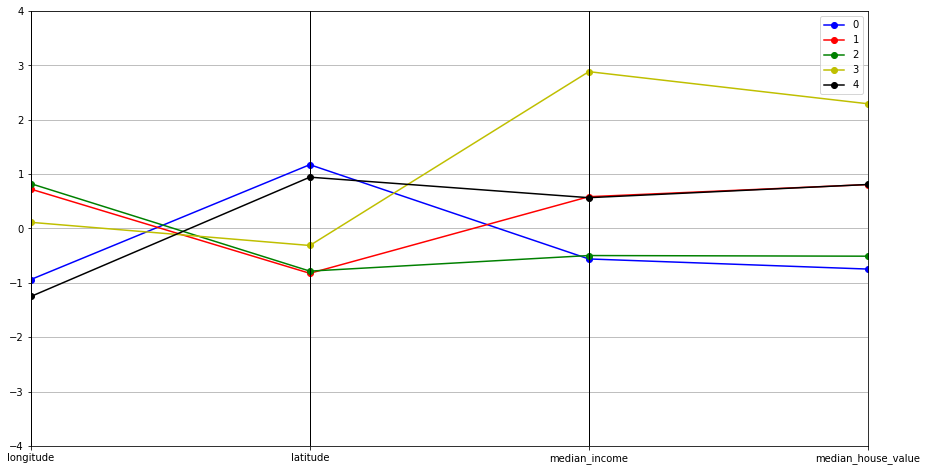

In [21]:
# Function that creates Parallel Plots
def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-4,+4])
	pd.plotting.parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

parallel_plot(P)


In [22]:
# Create cluster label
df_Calidata['clustered_region'] = kMeans.fit_predict(X)
df_Calidata['clustered_region'] = df_Calidata['clustered_region'].astype("category")
df_Calidata.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,clustered_region
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0


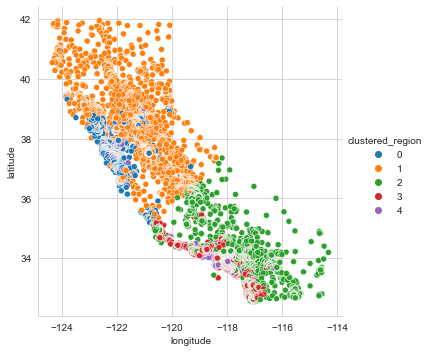

In [23]:
# plotting the clusters
sns.set_style('whitegrid')
sns.relplot(x='longitude', y='latitude', hue='clustered_region', data=df_Calidata, kind='scatter');

In [24]:
# description of the median attributes of the dataset
median_attributes = ['clustered_region', 'median_house_value', 'median_income', 'housing_median_age']
income_house = df_Calidata[median_attributes]
income_house.groupby(['clustered_region']).describe()

median_house_value                                         \
                              count           mean           std       min   
clustered_region                                                             
0                            3131.0  300466.447461  84737.820368  110000.0   
1                            5376.0  120660.007068  47863.379533   14999.0   
2                            7430.0  148721.036070  50743.447600   14999.0   
3                            3809.0  302588.399580  85550.069150   67500.0   
4                             894.0  472616.223714  52955.979040  112500.0   

                                                         median_income  \
                       25%       50%       75%       max         count   
clustered_region                                                         
0                 239200.0  279800.0  350000.0  500001.0        3131.0   
1                  82675.0  112800.0  154825.0  310000.0        5376.0   
2                 111700.0  150500.0  182100.0  375000.0        7430.0   
3                 235900.0  283200.0  350000.0  500001.0        3809.0   
4                 466475.0  500001.0  500001.0  500001.0         894.0   

                            ...                     housing_median_age  \
                      mean  ...        75%      max              count   
clustered_region            ...                                          
0                 4.947542  ...   5.765500  10.2264             3131.0   
1                 2.806411  ...   3.450675   6.2299             5376.0   
2                 2.939861  ...   3.633525   6.2715             7430.0   
3                 5.005807  ...   5.791400  10.2264             3809.0   
4                 9.398593  ...  10.447725  15.0001              894.0   

                                                                     
                       mean        std  min   25%   50%   75%   max  
clustered_region                                                     
0                 30.349409  13.932972  1.0  19.0  29.0  42.0  52.0  
1                 27.926897  12.831765  1.0  17.0  27.0  37.0  52.0  
2                 28.789098  11.764587  1.0  19.0  30.0  37.0  52.0  
3                 27.798372  12.230918  2.0  18.0  28.0  36.0  52.0  
4                 29.276286  13.532043  2.0  19.0  30.0  38.0  52.0  

[5 rows x 24 columns]